please open the jupyter notebook with this command:(because we will have limited reaching error in normal condition.)


jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

In [1]:
library(caret) 

Loading required package: lattice
Loading required package: ggplot2


# Q1

In [2]:
train_data<-read.table("optdigits.tra", sep ="," )

In [3]:
test_data<-read.table("optdigits.tes", sep = ",")

In [4]:
y_train=matrix(train_data[,65], nrow=3823, ncol=1)


y_test = test_data[,65]
df_y_t<-data.frame(y_test)


In [5]:
dim(train_data)
dim(test_data)

[1] 3823   65

[1] 1797   65

In [6]:
X_test = test_data[,(1:64)]
X_train = train_data[,(1:64)]
dim(X_test)

[1] 1797   64

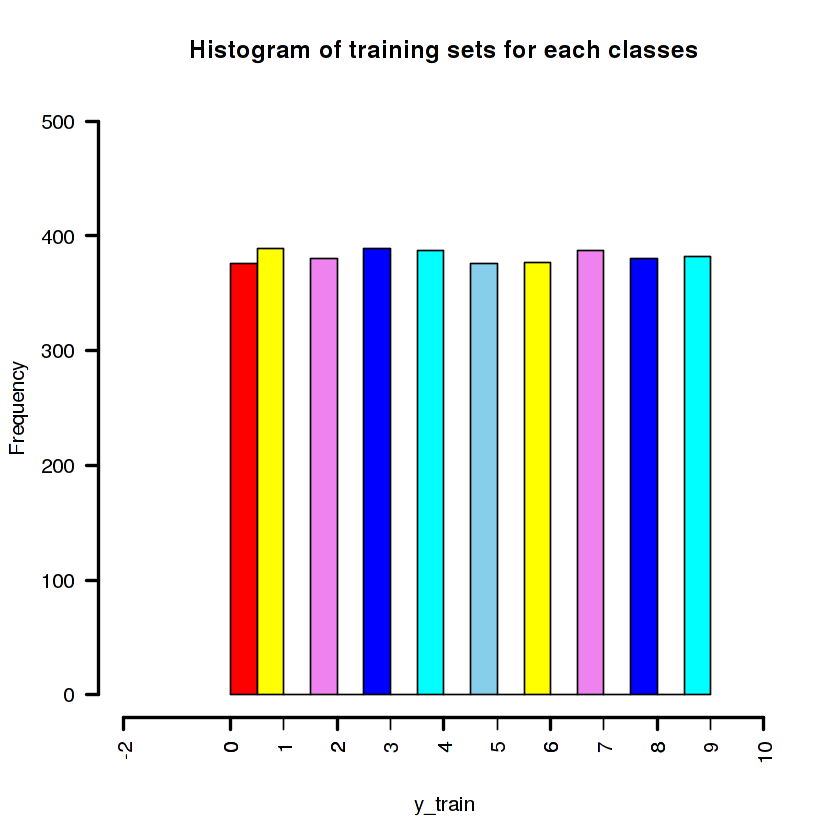

In [7]:
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan","black","skyblue")
hist(y_train, xlim = c(-2,10), col = colors, ylim = c(0,500), main="Histogram of training sets for each classes",
     xpd=TRUE,las=2, lwd=2)
axis(1, 0:9, las=2)

In [8]:
var_of_testset<-NULL #variance for test set
number_of_class=10
for (i in 1:64){ 
    var_of_testset[i]=var(X_test[,i])
    
}


In [9]:
var_of_trainset<-NULL
number_of_class=10
for (i in 1:64){ 
    var_of_trainset[i]=var(X_train[,i])
    
}


In [10]:
vectorize_var<-matrix(var_of_trainset, nrow=64, ncol=1)
vectorize_test<-matrix(var_of_testset, nrow=64, ncol=1)#test set

In [11]:
zero_var=which(vectorize_var==0)
zero_test=which(vectorize_test==0)


In [12]:
df<-data.frame(X_train)

dt<-data.frame(X_test)

In [13]:
 df<-df[,-1]
 df<-df[,-39]
 dt<-dt[,-1]
 dt<-dt[,-39]
print("The Feature with variance of Zero has been deleted!!")
print("number of features:")
ncol(df)
ncol(dt)
vr<-NULL

[1] "The Feature with variance of Zero has been deleted!!"
[1] "number of features:"


[1] 62

[1] 62

In [14]:
for(i in 1:62)
    {
   vr[i]<-var(df[,i])
    
}

In [15]:
ss=matrix(nrow = 10,ncol = 62)


In [16]:
#train_classify<-NULL
#y_sample<-NULL
mean_matrix=matrix(0,nrow=10,ncol =62)
CovarianceMatrix <- array(0, dim=c(10,62,62))

#freqency_of_casses=matrix(NA, nrow=10,ncol = 1)
common_co=matrix(0,nrow = 62,ncol = 62)
df_y_sample<-NULL
nume_of_e_class<-matrix(0,nrow = 10,ncol = 1)

In [17]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
mean_matrix<-matrix(1,nrow=10,ncol =62)

arr0 <- array(1, dim=c(10,62,62))


for(j in 0:9)
    {
    train_classify<-df[df_y_sample[i,1],]
    
y_sample<-which(y_train==j)
    
df_y_sample<-data.frame(y_sample)
k=nrow(df_y_sample)
nume_of_e_class[j+1,1]<-nrow(df_y_sample) #store the number of each class data point frequency   

for(i in 1:k)
    {
    
    train_classify[i,]<-df[df_y_sample[i,1],]

}
    c<-train_classify
     mean_matrix[j+1,]<-apply(train_classify,2,mean)

  SubtractedMatrix<-NULL
  SubtractedMatrix = matrix(0, nrow = k, ncol = 62)
  
    
    
  for(i in 1:k)
  {
    SubtractedMatrix[i,]=as.matrix(train_classify[i,]-mean_matrix[j+1,])
  }
  #Generating Covariance matrix
  CovarianceMatrix[j+1,,]<-as.matrix(t(SubtractedMatrix))%*%as.matrix(SubtractedMatrix)/k

   
   
    y_sample<-NULL
    
     }

In [18]:
dim(CovarianceMatrix)

[1] 10 62 62

In [19]:
pri_prob<-matrix(0,nrow = 10,ncol = 1)

In [20]:
#priror probability of class for commoncovariance
c_freq<-c(376, 389, 380,389,387,376,377,387,380,382) 
#pri_prob<-matrix(0,nrow = 10,ncol = 1)
Num_sample=3823
for(i in 0:9)
    {
    pri_prob[i+1,1]<-c_freq[i+1]/Num_sample
}

In [21]:
p_diag=matrix(1:62,ncol =1,nrow = 62)

In [22]:
#common covariance

common_co=matrix(0,nrow = 62,ncol = 62)
for(i in 0:9)
    {
    common_co<-common_co+(pri_prob[i+1,1]*CovarianceMatrix[i+1,,])
}


In [23]:
mean_co<-mean(diag(common_co))
df_diag_co<-data.frame(diag(common_co))

In [24]:
mean_co

[1] 11.03244

In [25]:

diag_com1<-data.frame(diag(common_co))
var_com=apply(diag_com1,2,mean)


In [26]:
dim(mean_matrix)


[1] 10 62

In [27]:
#discriminant function
discriminant_fu <- function(X, M, S, P) {
    
g = matrix(0,nrow = 3823,ncol = 10)
   for (i in 0:9){
       
   
       
   g[,i+1] = -1/2 * sum(((as.matrix(t(X)) - as.vector(M[i+1]))^2)/S) +  log10(P[i+1])
       
     
       
          

}
    return (g) 
  
}


In [28]:
discriminant_fu <- function(TrainData_X, MeanData, VarianceData, PriorData)
{
  g = matrix(0,nrow = dim(TrainData_X)[1],ncol = 10)
  for(i in 0:9)
  {
    mean_tmp <- as.vector(MeanData[i+1,])
    g[,i+1] = -(1/2) * colSums(((as.matrix(t(TrainData_X)) - mean_tmp)^2)/VarianceData)+log(PriorData[i+1])

  }
  return(g)
}

In [29]:
dim(df)

[1] 3823   62

In [30]:
#finding the discriminant in two mode (Q1a and Q1b)
g_train = discriminant_fu(df, mean_matrix, diag(common_co), pri_prob)
g_train2 = discriminant_fu(dt, mean_matrix, diag(common_co), pri_prob)
g_train3 = discriminant_fu(df, mean_matrix, mean_co, pri_prob)
g_train4 = discriminant_fu(dt, mean_matrix, mean_co, pri_prob)#test mode

In [31]:
df_g<-data.frame(g_train)
gmax<-apply(df_g,1,max)
max_g<-matrix(0,nrow =3823,ncol = 1 )
max_g_t<-matrix(0,nrow = 1797,ncol = 1)
num_train<-3823
max_g1<-matrix(0,nrow =3823,ncol = 1 )
max_g_t1<-matrix(0,nrow = 1797,ncol = 1)
nume_of_testset=1797
numee_of_trainset=3823

In [32]:

for(i in 1:3823) #for train set 
    {
   max_g[i,1]<-which.max(g_train[i,]) # find the maximum of g for each row
}
train_output<-max_g-1
counter=0
for(i in 1:3823)
    {
    if(train_output[i,1]==y_train[i,1]){ #find the number of true prediction
      counter=counter+1  
    }
    
}

accuracy=counter/numee_of_trainset
error=1-accuracy

print("rate of error for whole classes")
print(error)
print("Accuracy of whole classes for training data:")
print(accuracy)
for(j in 0:9)
    {
    
    
 
}



[1] "rate of error for whole classes"
[1] 0.08579649
[1] "Accuracy of whole classes for training data:"
[1] 0.9142035


In [33]:
expected<-as.matrix(y_train)
dim(expected)
dim(expected)


[1] 3823    1

[1] 3823    1

In [34]:
results6 <- confusionMatrix(data=train_output, reference=expected)
results6

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6   7   8   9
         0 373   0   0   0   1   0   0   0   1   1
         1   0 333   1   0   3   1   5   3  19   7
         2   0  16 346   2   0   0   0   2   0   2
         3   0   1   2 358   0   3   0   1   3  14
         4   1   0   0   0 340   2   1   1   2   7
         5   0   0   0   5   6 324   0   1   2   3
         6   1   4   0   0   3   0 370   0   3   0
         7   0   2   4   7  20   2   0 376   0  14
         8   0  17  20   5   6   0   1   2 343   2
         9   1  16   7  12   8  44   0   1   7 332

Overall Statistics
                                          
               Accuracy : 0.9142          
                 95% CI : (0.9049, 0.9229)
    No Information Rate : 0.1018          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9047          
 Mcnemar's Test P-Value : NA              

Statistics by Class:


In [35]:
for(i in 1:1797) #for test set 
    {
   max_g_t[i,1]<-which.max(g_train2[i,])
}
train_output<-max_g_t-1
counter2=0
for(i in 1:1797)
    {
    if(train_output[i,1]==df_y_t[i,1]){
      counter2=counter2+1  
    }
    
}

counter2/nume_of_testset

counter2
accuracy5<-counter2/nume_of_testset
print("rate of error for whole classes")
print(1-accuracy5)
print("Accuracy of whole classes for training data:")
print(accuracy)


[1] 0.8931553

[1] 1605

[1] "rate of error for whole classes"
[1] 0.1068447
[1] "Accuracy of whole classes for training data:"
[1] 0.9142035


In [36]:
expected1<-as.matrix(df_y_t)

In [37]:
results <- confusionMatrix(data=train_output, reference=expected1)
results

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6   7   8   9
         0 177   0   1   0   0   0   1   0   0   0
         1   0 135   6   0   4   0   5   0  21   3
         2   0  21 156   2   0   0   0   0   1   1
         3   0   0   0 158   0   1   0   0   1   7
         4   1   0   1   0 170   1   0   3   0   5
         5   0   1   0   3   0 172   0   0   2   4
         6   0   4   0   0   0   1 174   0   1   0
         7   0   0   1   7   3   0   0 173   1   3
         8   0   8  10   6   3   0   1   2 137   4
         9   0  13   2   7   1   7   0   1  10 153

Overall Statistics
                                          
               Accuracy : 0.8932          
                 95% CI : (0.8779, 0.9071)
    No Information Rate : 0.1018          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8813          
 Mcnemar's Test P-Value : NA              

Statistics by Class:


In [38]:
counter3=0
for(i in 1:3823) #for train set hypersphere
    {
   max_g1[i,1]<-which.max(g_train3[i,])
}
train_output3<-max_g1-1

for(i in 1:3823)
    {
    if(train_output3[i,1]==y_train[i,1]){
      counter3=counter3+1  
    }
    
}

accuracy2=counter3/numee_of_trainset
error2=1-accuracy2

print("rate of error for whole classes")
print(error2)
print("Accuracy of whole classes for training data:")
print(accuracy2)
for(j in 0:9)
    {
    
    

}


[1] "rate of error for whole classes"
[1] 0.0816113
[1] "Accuracy of whole classes for training data:"
[1] 0.9183887


In [39]:
expected<-as.matrix(y_train)

In [40]:

results2 <- confusionMatrix(data=train_output3, reference=expected)
results2

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6   7   8   9
         0 371   0   0   0   0   0   0   0   0   0
         1   1 338   0   2   7   1   3   2  17   6
         2   0  13 345   2   0   2   0   0   2   0
         3   0   1   2 357   0   3   0   1   6   8
         4   2   0   0   0 346   2   1   2   2   8
         5   0   0   0   5   2 322   0   0   2   3
         6   1   4   1   0   5   1 373   0   4   0
         7   0   2   5   5  18   0   0 378   1  15
         8   0  11  17   6   5   0   0   3 341   2
         9   1  20  10  12   4  45   0   1   5 340

Overall Statistics
                                          
               Accuracy : 0.9184          
                 95% CI : (0.9093, 0.9269)
    No Information Rate : 0.1018          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9093          
 Mcnemar's Test P-Value : NA              

Statistics by Class:


In [41]:
counter4=0
for(i in 1:1797) #for test set with hyperspher
    {
   max_g_t1[i,1]<-which.max(g_train4[i,])
}
train_output4<-max_g_t1-1

for(i in 1:1797)
    {
    if(train_output4[i,1]==df_y_t[i,1]){
      counter4=counter4+1  
    }
    
}
#index_predict<-NULL
#train_output<-NULL
print("accuracy:")
accuracy4=counter4/nume_of_testset
#train_output
print(accuracy4)

print("error of test sets")

error4=1-accuracy4
print(error4)


[1] "accuracy:"
[1] 0.8937117
[1] "error of test sets"
[1] 0.1062883


In [42]:
library(caret)


In [43]:
expected1<-as.matrix(df_y_t)

In [44]:
results <- confusionMatrix(data=train_output4, reference=expected1)
results

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6   7   8   9
         0 175   0   1   0   0   0   1   0   0   0
         1   0 136   6   0   8   0   3   0  19   3
         2   0  16 157   1   0   0   0   0   1   0
         3   0   1   2 162   0   0   0   0   1   5
         4   2   0   0   0 165   1   0   3   0   5
         5   1   1   0   2   0 171   0   2   3   4
         6   0   5   0   0   0   1 175   0   1   0
         7   0   0   2   7   3   0   0 170   1   3
         8   0   7   5   5   4   0   2   2 138   3
         9   0  16   4   6   1   9   0   2  10 157

Overall Statistics
                                          
               Accuracy : 0.8937          
                 95% CI : (0.8785, 0.9076)
    No Information Rate : 0.1018          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8819          
 Mcnemar's Test P-Value : NA              

Statistics by Class:
